# Spotify Data: Popular Hip-hop Artists and Tracks

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful?

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv("spotify.csv")
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [64]:
df.tail()

,Artist,Track Name,Popularity,Duration (ms),Track ID
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6
439,Rick Ross,Stay Schemin,68,267720,0nq6sfr8z1R5KJ4XUk396e


In [66]:
df.isnull().sum() #checking null values

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [68]:
df.duplicated().sum() #checking duplicates value

27

In [74]:
df.drop_duplicates(inplace = True)

In [72]:
df.duplicated().sum() #there is no duplicates value now

0

2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

In [77]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

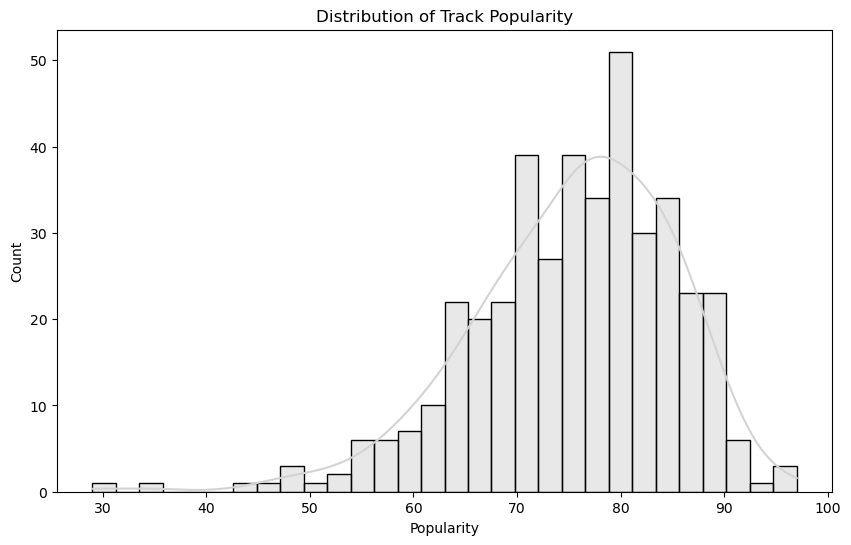

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='lightgrey')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

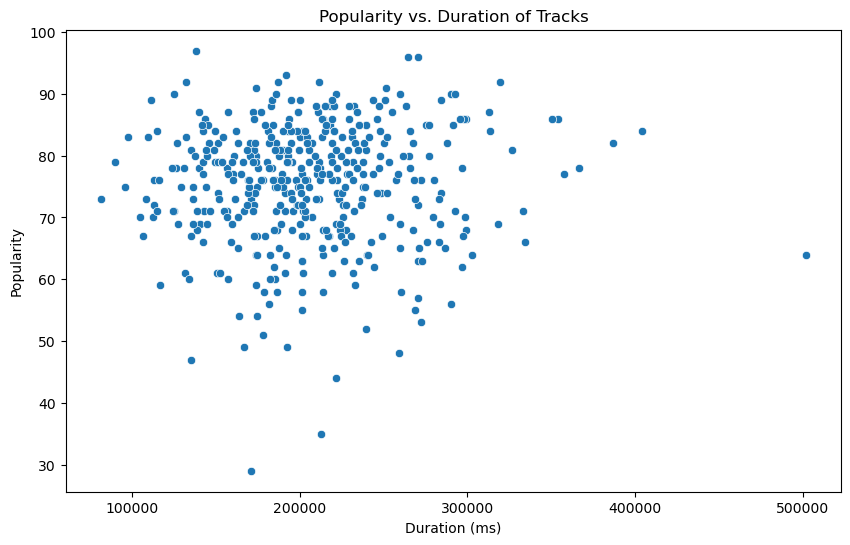

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title("Popularity vs. Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot?

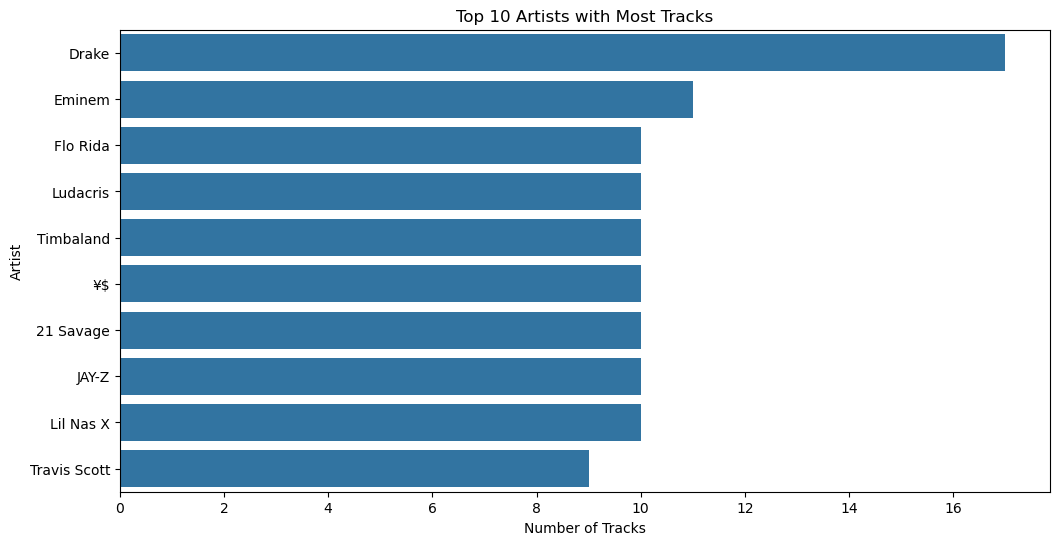

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().head(10).index)
plt.title("Top 10 Artists with Most Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

In [98]:
least_popular = df.sort_values(by='Popularity').head(5)
print(least_popular[['Artist', 'Track Name', 'Popularity']])

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist?

In [103]:
top_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
print(top_artists)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


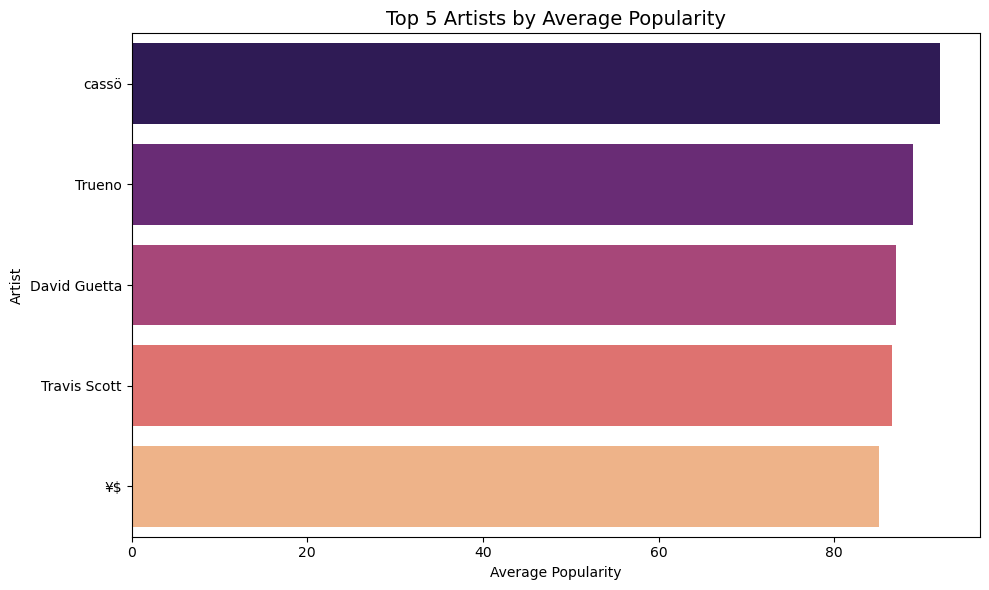

In [123]:
top_artists_df = top_artists.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Popularity', y='Artist', data=top_artists_df, palette='magma')
plt.title("Top 5 Artists by Average Popularity", fontsize=14)
plt.xlabel("Average Popularity")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [128]:
top5_artists = top_artists.index.tolist()
for artist in top5_artists:
    track = df[df['Artist'] == artist].sort_values(by='Popularity', ascending=False).iloc[0]
    print(f"{artist} - {track['Track Name']} (Popularity: {track['Popularity']})")

cassö - Prada (Popularity: 92)
Trueno - Mamichula - con Nicki Nicole (Popularity: 89)
David Guetta - Baby Don't Hurt Me (Popularity: 87)
Travis Scott - FE!N (feat. Playboi Carti) (Popularity: 93)
¥$ - CARNIVAL (Popularity: 96)


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot?

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


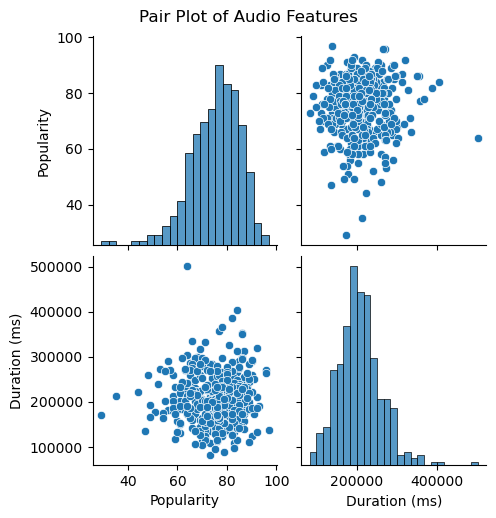

In [133]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle("Pair Plot of Audio Features", y=1.02)
plt.show()

9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot?

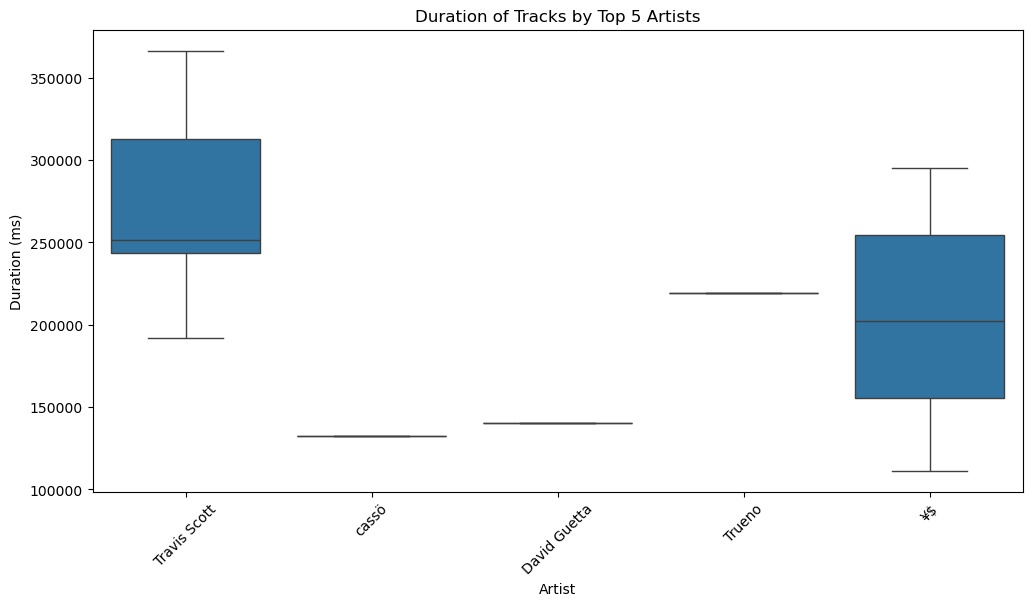

In [138]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(top5_artists)])
plt.title("Duration of Tracks by Top 5 Artists") #we take sample of 5 artists to visualize properly
plt.xticks(rotation=45)
plt.show()

10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot?

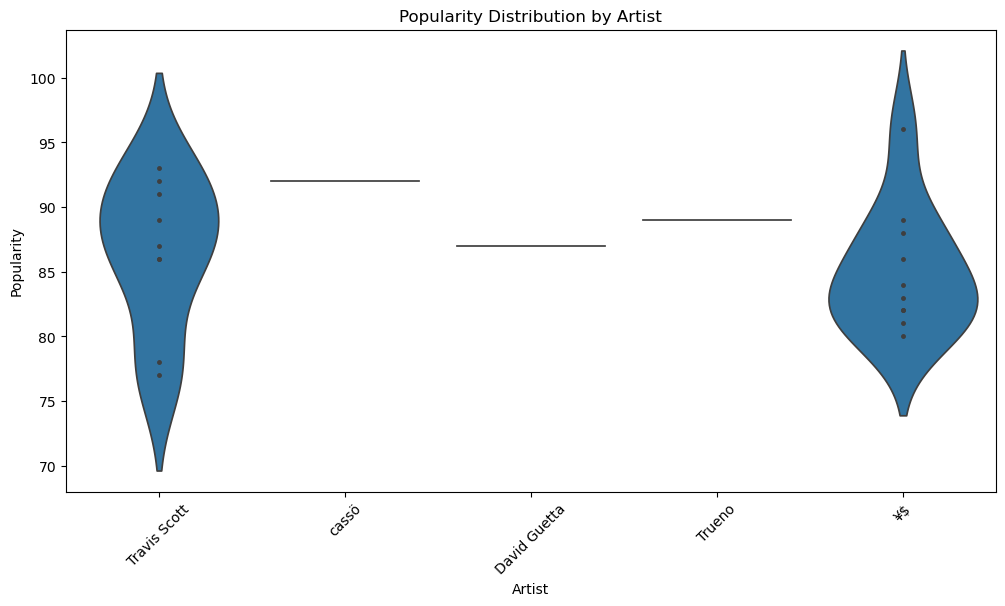

In [143]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top5_artists)], inner='point')
plt.title("Popularity Distribution by Artist")
plt.xticks(rotation=45)
plt.show()